In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
y_train.shape

(50000, 1)

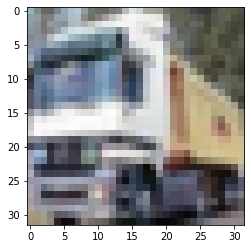

In [4]:
plt.imshow(x_train[1])

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

def plot_result(x,y,index,title_str):
    plt.title(title_str)
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

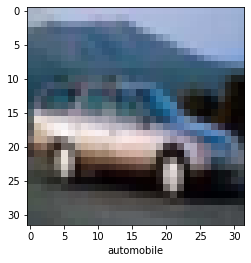

In [8]:
plot_sample(x_train,y_train,4)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(x_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.4904 - accuracy: 0.4628
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.1372 - accuracy: 0.5982
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.0032 - accuracy: 0.6495
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.9220 - accuracy: 0.6774
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8544 - accuracy: 0.7016
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.7982 - accuracy: 0.7238
Epoch 7/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.7482 - accuracy: 0.7414
Epoch 8/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.7066 - accuracy: 0.7547
Epoch 9/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.6682 - accuracy: 0.7681s - los
Epoch 1

In [13]:
cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 298us/sample - loss: 0.9032 - accuracy: 0.7062


[0.9032016688346863, 0.7062]

In [14]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.68212151e-04, 8.68027428e-07, 2.05904618e-03, 5.03552914e-01,
        3.50852468e-04, 4.91076291e-01, 2.34259828e-03, 6.12706845e-06,
        4.42228134e-04, 8.92999140e-07],
       [7.16799451e-03, 4.40785382e-03, 2.80432027e-06, 6.47933476e-08,
        2.13648363e-07, 2.04820640e-08, 7.70772246e-08, 4.01456701e-10,
        9.88206446e-01, 2.14500018e-04],
       [2.62897927e-02, 1.49401858e-01, 2.66764895e-03, 6.84307364e-04,
        5.77696948e-04, 1.12392256e-04, 5.25160984e-04, 3.30186420e-04,
        7.82767951e-01, 3.66429426e-02],
       [9.54297483e-01, 3.28294840e-03, 1.27850259e-02, 3.50659509e-04,
        1.17811132e-02, 1.06719999e-04, 5.98570157e-04, 9.26763169e-04,
        1.49386236e-02, 9.32020019e-04],
       [3.41709523e-08, 6.86953899e-06, 1.04647018e-02, 1.39364833e-02,
        2.57609844e-01, 2.22420623e-03, 7.15754211e-01, 3.16975638e-06,
        4.33427232e-07, 7.10550196e-08]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 3, 6, 3, 1]

In [16]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [17]:
y_test=y_test.reshape(-1,)

In [25]:
actual_value1=0
predicted_value1=0
for i in range(0,len(y_test)):
    if(y_classes[i]==y_test[i]):
        actual_value1=y_test[i]
        predicted_value1=y_classes[i]
        print("actual value: "+str(y_test[i]))
        print("predicted value: "+str(y_classes[i]))
        print("position: "+str(i))
        break

actual value: 3
predicted value: 3
position: 0


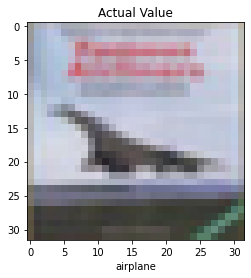

In [27]:
plot_result(x_test,y_test,actual_value1,"Actual Value")

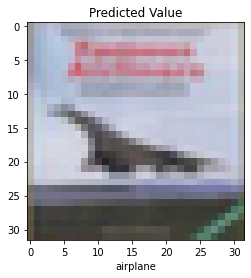

In [28]:
plot_result(x_test,y_test,actual_value1,"Predicted Value")

In [26]:
actual_value2=0
predicted_value2=0
for i in range(0,len(y_test)):
    if(y_classes[i]!=y_test[i]):
        actual_value2=y_test[i]
        predicted_value2=y_classes[i]
        print("actual value: "+str(y_test[i]))
        print("predicted value: "+str(y_classes[i]))
        print("position: "+str(i))
        break

actual value: 1
predicted value: 3
position: 6


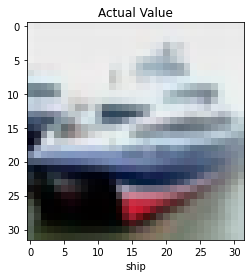

In [29]:
plot_result(x_test,y_test,actual_value2,"Actual Value")

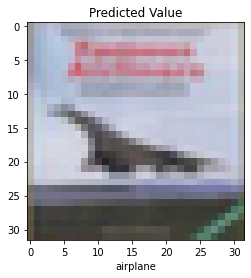

In [30]:
plot_result(x_test,y_test,predicted_value2,"Predicted Value")

In [61]:
image_read=cv2.imread("F:/DataSet/image/Webp.net-resizeimage.png")/255;
image_read.shape
# image_read

(32, 32, 3)

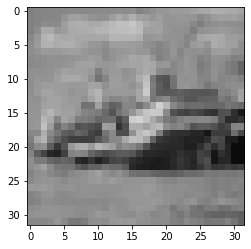

In [62]:

image_read=image_read.reshape(1,32,32,3)
plt.imshow(image_read[0])

In [63]:
y_p=cnn.predict(image_read)

In [64]:
y_p

array([[1.5091576e-02, 2.2104461e-02, 6.1868335e-04, 9.1952679e-04,
        8.9736073e-05, 2.0779362e-05, 5.3939194e-04, 5.2454698e-06,
        8.9492345e-01, 6.5687217e-02]], dtype=float32)

In [65]:
a = [np.argmax(element) for element in y_p]
a

[8]

In [68]:
classes[8]

'ship'